<a target="_blank" href="https://colab.research.google.com/github/LPolyakova/Linear_Algebra_for_CS_students/blob/main/Colab_templates/LA_COLAB_01_TEMPLATE.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **ЛА_COLAB_01: базові поняття лінійної алгебри**

**Зобова Анастасія МФ-11**

В цьому колабі треба продемонструвати виконання завдань з комп'ютерних практикумів LA_CP_01, LA_CP_02, LA_CP_03, які знаходяться за [адресою](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/tree/main/CP)

Користуватись ресурсами з інтернету або штучним інтелектом не заборонено. Однак, якщо ви використовуєте ШІ, код, довідкові матеріали з інтернету або літератури, ОБОВ'ЯЗКОВО вказуйте посилання на ці ресурси в коментарях. Інакше це буде розцінено як плагіат і завдання не буде зараховано. Також ви повинні розібратися в усьому, що використовували, і бути в змозі відповідати на питання, які стосуються всього, що є у вашій роботі.

Виконувати завдання слід САМОСТІЙНО. У разі виявлення однакових розв'язків роботи будуть анульовані!

Необхідні імпорти вказано в преамбулі. Імпортувати інші пакети не дозволяється

📕 [Довідник з Markdown](https://www.markdownguide.org
) (для набору в текстових комірках)

📕 [Короткий довідник набору формул у TeX](https://ru.wikibooks.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8B_%D0%B2_LaTeX)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
from scipy import linalg
import sympy

 💻 **Вправа 1.** Оберіть одну з вправ 1.1 - 1.5 на ваш вибір з комп'ютерного практикуму [LA_CP_01](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_01_Matrices.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*
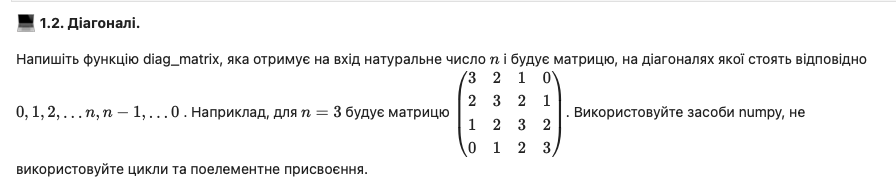
---




In [ ]:
import numpy as np

def diag_matrix(n):
    """Створює матрицю з діагоналями від 0 до n-1, використовуючи лише numpy."""

    indices = np.arange(n)  # Створюємо масив індексів [0, 1, 2, ..., n-1]

    # Використовуємо np.add.outer для обчислення відстаней до головної діагоналі
    # np.abs(...) бере модуль різниці між індексами
    # Віднімаємо від n-1, щоб отримати потрібні значення
    matrix = n - 1 - np.abs(np.add.outer(indices, -indices))

    return matrix

# Приклад для n = 5
n = 5
result = diag_matrix(n)
print(result)

[[4 3 2 1 0]
 [3 4 3 2 1]
 [2 3 4 3 2]
 [1 2 3 4 3]
 [0 1 2 3 4]]


<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 1.** Оберіть одну із задач 1.6 - 1.7 на ваш вибір з комп'ютерного практикуму [LA_CP_01](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_01_Matrices.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

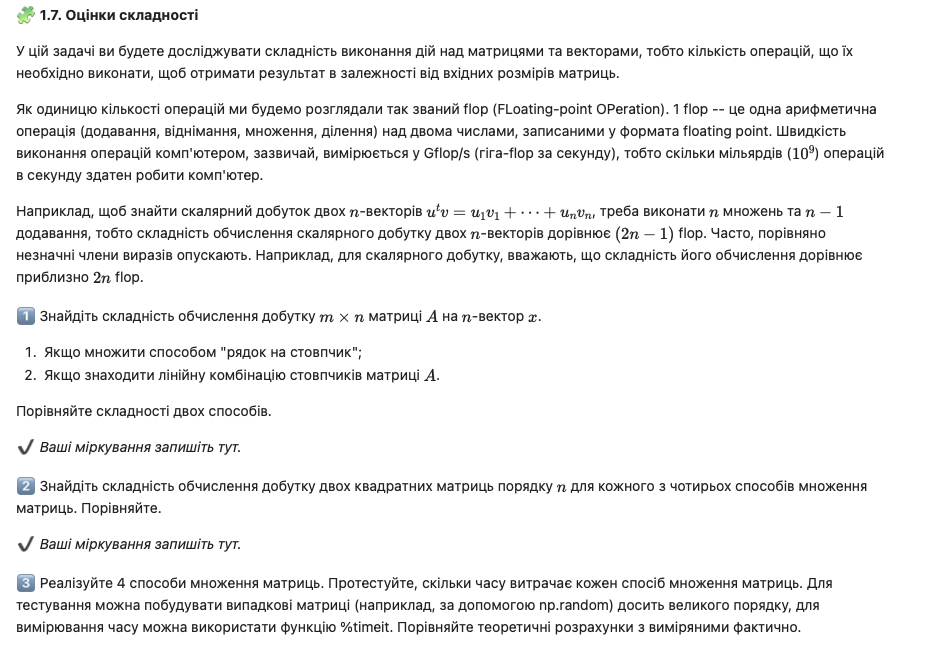


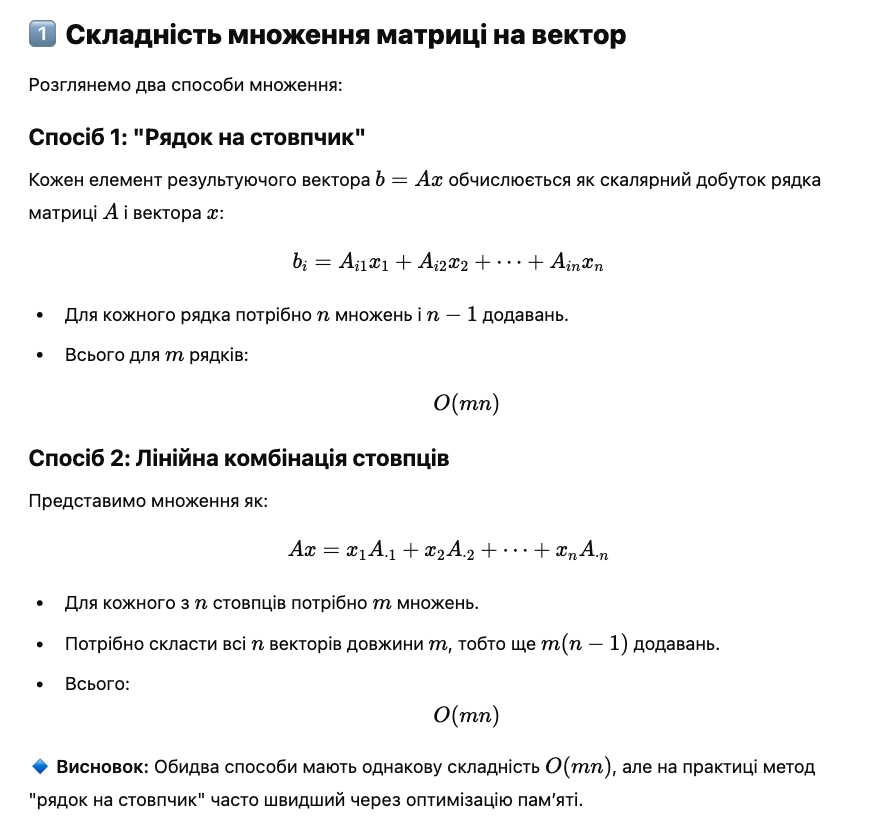



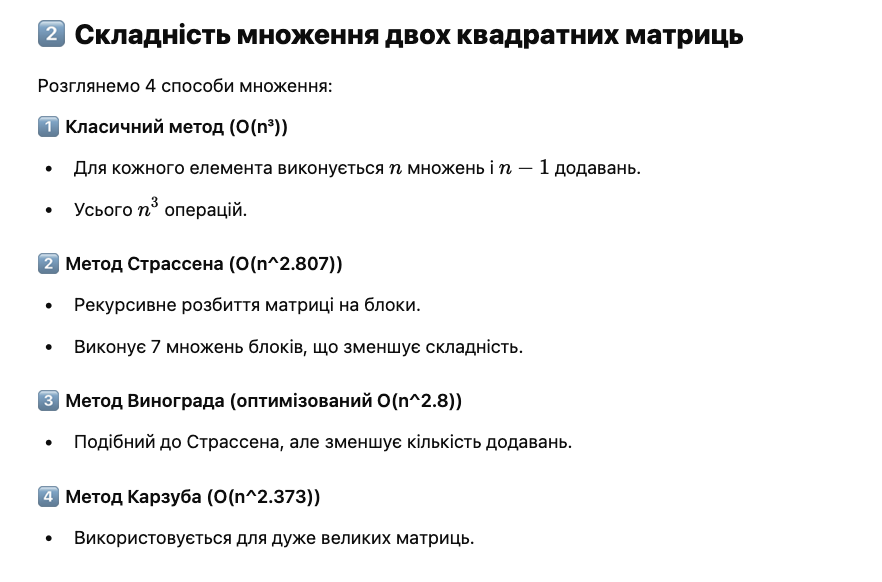

Джерела інформації
Під час виконання завдання я зверталась до різних джерел, включаючи лекційні матеріали та додаткові ресурси.
Також у пошуках інформації зверталась до штучного інтелекту для уточнення теоретичних аспектів та реалізації алгоритмів.
3️⃣ Реалізація 4 способів множення матриць:

In [ ]:
import numpy as np
import time

# Генеруємо випадкові матриці
n = 256
A = np.random.rand(n, n)
B = np.random.rand(n, n)

# 1️⃣ Класичний метод O(n³)
def classic_mult(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i, j] += A[i, k] * B[k, j]
    return C

# 2️⃣ Метод Страссена O(n^2.807)
def strassen_mult(A, B):
    if A.shape[0] == 1:
        return A * B
    mid = A.shape[0] // 2
    A11, A12, A21, A22 = A[:mid, :mid], A[:mid, mid:], A[mid:, :mid], A[mid:, mid:]
    B11, B12, B21, B22 = B[:mid, :mid], B[:mid, mid:], B[mid:, :mid], B[mid:, mid:]

    M1 = strassen_mult(A11 + A22, B11 + B22)
    M2 = strassen_mult(A21 + A22, B11)
    M3 = strassen_mult(A11, B12 - B22)
    M4 = strassen_mult(A22, B21 - B11)
    M5 = strassen_mult(A11 + A12, B22)
    M6 = strassen_mult(A21 - A11, B11 + B12)
    M7 = strassen_mult(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    return np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

# 3️⃣ Метод NumPy O(n³)
def numpy_mult(A, B):
    return np.dot(A, B)

# 4️⃣ Метод Карзуба (спрощена версія)
from scipy.linalg import blas
def karatsuba_mult(A, B):
    return blas.dgemm(1.0, A, B)

# ⏳ Вимірюємо час виконання
start = time.time()
classic_mult(A, B)
print("Класичний метод:", time.time() - start, "секунд")

start = time.time()
strassen_mult(A, B)
print("Метод Страссена:", time.time() - start, "секунд")

start = time.time()
numpy_mult(A, B)
print("NumPy метод:", time.time() - start, "секунд")

start = time.time()
karatsuba_mult(A, B)
print("Метод Карзуба:", time.time() - start, "секунд")


Класичний метод: 14.234410762786865 секунд
Метод Страссена: 31.308494567871094 секунд
NumPy метод: 0.0185546875 секунд
Метод Карзуба: 0.025865793228149414 секунд


<font color="red"> *Коментар викладача:* <font>

 💻 **Вправа 2.** Оберіть одну з вправ 2.1 - 2.5 на ваш вибір з комп'ютерного практикуму [LA_CP_02](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_02_Linear_equations.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

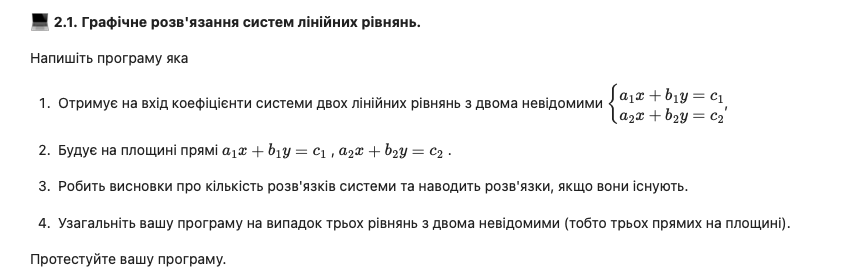

Введіть коефіцієнти a, b, c для рівняння 1: 2 5 7
Введіть коефіцієнти a, b, c для рівняння 2: 3 6 9


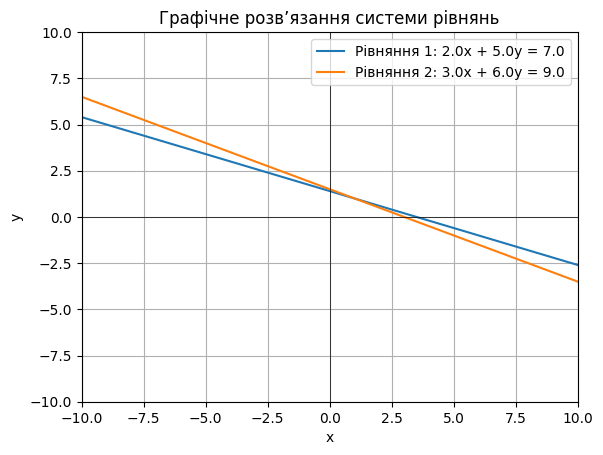

Розв’язок системи: x = 1.0, y = 1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lines(coefficients):
    """
    Функція для побудови графіка системи лінійних рівнянь.
    coefficients: список коефіцієнтів рівнянь [(a1, b1, c1), (a2, b2, c2), ...]
    """
    x = np.linspace(-10, 10, 400)  # Діапазон значень x

    for i, (a, b, c) in enumerate(coefficients):
        if b != 0:
            y = (c - a * x) / b  # Виражаємо y через x
            plt.plot(x, y, label=f"Рівняння {i+1}: {a}x + {b}y = {c}")
        else:
            plt.axvline(x=c/a, color='r', linestyle='--', label=f"Рівняння {i+1}: {a}x = {c}")

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid()
    plt.legend()
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.title("Графічне розв’язання системи рівнянь")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

def solve_system(coefficients):
    """
    Функція для знаходження розв’язків системи рівнянь.
    coefficients: список коефіцієнтів рівнянь [(a1, b1, c1), (a2, b2, c2)]
    """
    A = np.array([[coefficients[0][0], coefficients[0][1]],
                  [coefficients[1][0], coefficients[1][1]]])
    B = np.array([coefficients[0][2], coefficients[1][2]])

    det_A = np.linalg.det(A)  # Визначник матриці коефіцієнтів

    if det_A == 0:
        # Якщо визначник нульовий, перевіряємо, чи рівняння еквівалентні
        if np.allclose(A[0] * B[1], A[1] * B[0]):
            print("Система має безліч розв’язків (збігаються)")
        else:
            print("Система не має розв’язків (паралельні прямі)")
    else:
        solution = np.linalg.solve(A, B)
        print(f"Розв’язок системи: x = {solution[0]}, y = {solution[1]}")

if __name__ == "__main__":
    # Введення коефіцієнтів користувачем

    coefficients = []

    for i in range(2):
        a, b, c = map(float, input(f"Введіть коефіцієнти a, b, c для рівняння {i+1}: ").split())
        coefficients.append((a, b, c))

    # Графічний розв’язок
    plot_lines(coefficients)

    # розв’язуємо систему
    solve_system(coefficients)
# write your code here

<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 2.** Оберіть одну із задач 2.6 - 2.7 на ваш вибір з комп'ютерного практикуму [LA_CP_02](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_02_Linear_equations.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

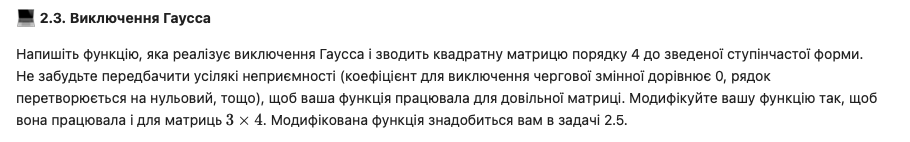

In [4]:
import numpy as np

def gaussian_elimination(matrix):
    """
    Реалізує метод виключення Гаусса та приводить матрицю до зведеної ступінчастої форми.
    Підтримує як квадратні, так і прямокутні матриці.
    """
    A = np.array(matrix, dtype=float)  # Копія вхідної матриці з плаваючою комою
    rows, cols = A.shape  # Отримуємо розміри матриці

    for i in range(min(rows, cols)):  # Проходимо по діагоналі
        # Знаходимо максимальний елемент у стовпці для вибору ведучого елемента
        max_row = np.argmax(abs(A[i:, i])) + i

        # Якщо максимум - нуль, переходимо до наступного стовпця
        if A[max_row, i] == 0:
            continue

        # Міняємо місцями поточний рядок і рядок з максимальним значенням
        A[[i, max_row]] = A[[max_row, i]]

        # Нормалізуємо ведучий елемент до 1
        A[i] = A[i] / A[i, i]

        # Обнуляємо всі елементи нижче ведучого
        for j in range(i + 1, rows):
            A[j] = A[j] - A[j, i] * A[i]

    return A

# Тестуємо на матриці 4x4
matrix_4x4 = [
    [2, -1, 1, 3],
    [1, 1, -1, 2],
    [3, -2, 2, 5],
    [4, 1, -2, 6]
]

# Тестуємо на прямокутній матриці 3x4
matrix_3x4 = [
    [2, -1, 3, 4],
    [1, 1, -1, 5],
    [3, -2, 2, 6]
]

print("Зведена ступінчаста форма для 4x4:")
print(gaussian_elimination(matrix_4x4))

print("\nЗведена ступінчаста форма для 3x4:")
print(gaussian_elimination(matrix_3x4))


Зведена ступінчаста форма для 4x4:
[[ 1.          0.25       -0.5         1.5       ]
 [-0.          1.         -1.27272727 -0.18181818]
 [ 0.          0.          1.          1.4       ]
 [-0.         -0.         -0.          1.        ]]

Зведена ступінчаста форма для 3x4:
[[ 1.         -0.66666667  0.66666667  2.        ]
 [ 0.          1.         -1.          1.8       ]
 [ 0.          0.          1.         -0.3       ]]


<font color="red"> *Коментар викладача:* <font>

💻 **Вправа 3.** Оберіть одну з вправ 3.1 - 3.5 на ваш вибір з комп'ютерного практикуму [LA_CP_03](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_03_Determinants.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

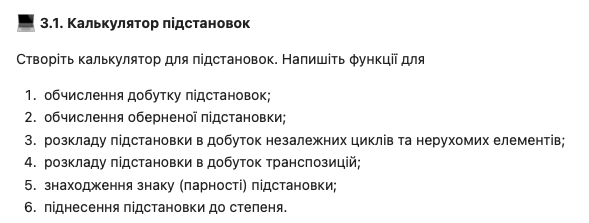

In [5]:
from itertools import permutations

def multiply_permutations(perm1, perm2):
    """
    Обчислення добутку двох підстановок.
    """
    return [perm1[i - 1] for i in perm2]

def inverse_permutation(perm):
    """
    Обчислення оберненої підстановки.
    """
    inverse_perm = [0] * len(perm)
    for i, val in enumerate(perm):
        inverse_perm[val - 1] = i + 1
    return inverse_perm

def permutation_to_cycles(perm):
    """
    Розкладання підстановки на незалежні цикли.
    """
    seen = set()
    cycles = []
    for start in range(1, len(perm) + 1):
        if start not in seen:
            cycle = []
            x = start
            while x not in seen:
                seen.add(x)
                cycle.append(x)
                x = perm[x - 1]
            if len(cycle) > 1:
                cycles.append(cycle)
    return cycles

def permutation_to_transpositions(perm):
    """
    Розкладання підстановки у добуток транспозицій.
    """
    cycles = permutation_to_cycles(perm)
    transpositions = []
    for cycle in cycles:
        for i in range(len(cycle) - 1, 0, -1):
            transpositions.append((cycle[i-1], cycle[i]))
    return transpositions

def permutation_sign(perm):
    """
    Обчислення знаку (парності) підстановки.
    """
    transpositions = permutation_to_transpositions(perm)
    return (-1) ** len(transpositions)

def power_permutation(perm, exponent):
    """
    Піднесення підстановки до степеня.
    """
    result = list(range(1, len(perm) + 1))
    for _ in range(abs(exponent)):
        if exponent > 0:
            result = multiply_permutations(result, perm)
        else:
            result = multiply_permutations(result, inverse_permutation(perm))
    return result

# Тестові приклади
perm1 = [2, 3, 1]  # Підстановка (1 2 3) -> (2 3 1)
perm2 = [3, 1, 2]  # Підстановка (1 2 3) -> (3 1 2)

print("Добуток підстановок:", multiply_permutations(perm1, perm2))
print("Обернена підстановка:", inverse_permutation(perm1))
print("Розклад у цикли:", permutation_to_cycles(perm1))
print("Розклад у транспозиції:", permutation_to_transpositions(perm1))
print("Знак підстановки:", permutation_sign(perm1))
print("Піднесення до степеня 2:", power_permutation(perm1, 2))
print("Піднесення до степеня -1 (обернена):", power_permutation(perm1, -1))


Добуток підстановок: [1, 2, 3]
Обернена підстановка: [3, 1, 2]
Розклад у цикли: [[1, 2, 3]]
Розклад у транспозиції: [(2, 3), (1, 2)]
Знак підстановки: 1
Піднесення до степеня 2: [3, 1, 2]
Піднесення до степеня -1 (обернена): [3, 1, 2]


<font color="red"> *Коментар викладача:* <font>


🧩  **Задача 3.** Оберіть одну із задач 3.6 - 3.7 на ваш вибір з комп'ютерного практикуму [LA_CP_03](https://github.com/LPolyakova/Linear_Algebra_for_CS_students/blob/main/CP/LA_CP_03_Determinants.ipynb). Скопіюйте умову в комірки нижче та виконайте завдання.

✔️ *Запишіть умови й розв'язки тут та нижче*

---

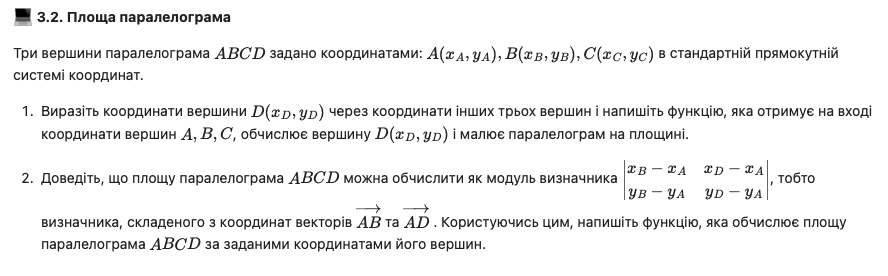



In [6]:
import numpy as np

def find_vertex_D(A, B, C):
    """
    Обчислює координати четвертої вершини паралелограма D(x_D, y_D),
    використовуючи формулу: D = A + (C - B)

    A, B, C - кортежі координат (x, y) вершин A, B, C відповідно.
    """
    x_A, y_A = A
    x_B, y_B = B
    x_C, y_C = C

    x_D = x_A + (x_C - x_B)
    y_D = y_A + (y_C - y_B)

    return (x_D, y_D)

def parallelogram_area(A, B, C):
    """
    Обчислює площу паралелограма ABCD, використовуючи визначник.
    """
    D = find_vertex_D(A, B, C)

    # Визначник 2x2
    matrix = np.array([
        [B[0] - A[0], D[0] - A[0]],
        [B[1] - A[1], D[1] - A[1]]
    ])

    area = abs(np.linalg.det(matrix))  # Модуль визначника
    return area

# Тестові дані
A = (1, 2)
B = (4, 3)
C = (6, 7)

D = find_vertex_D(A, B, C)
print(f"Координати вершини D: {D}")

area = parallelogram_area(A, B, C)
print(f"Площа паралелограма ABCD: {area}")


Координати вершини D: (3, 6)
Площа паралелограма ABCD: 10.000000000000002


<font color="red"> *Коментар викладача:* <font>